## Observations and Insights 

1. Capomulin and Ramicane seem to be the best treatments with the lowest average final tumor volume (40.67 and 40.21 mm3). They were also the ones with the most data points.
2. Infubinol has an outlier in the final tumor volume data. It would be best to analize this point to clean the data.
3. The Pearson's correlation coefficient is 0.84 which means there is a strong positive correlation between the average tumor volume and the weight of the mice on Capomulin drug treatment. From this insight we can determine that mice with lower weight have smaller tumor volume.

In [260]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [261]:
# Checking the number of mice.
unique_mice =len(study_data_complete["Mouse ID"].unique())
unique_mice

249

In [262]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = study_data_complete[study_data_complete.duplicated()]
print(mice_duplicate)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [263]:
# Optional: Get all the data for the duplicate mouse ID. 
# Mouse ID g989 is duplicated, so we check what index lines it is in.
print(study_data_complete[study_data_complete["Mouse ID"]== "g989"])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [264]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = study_data_complete.drop(range(908,921))
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [265]:
#Confirm there are no more duplicates
mice_duplicate_2 = clean_mice[clean_mice.duplicated()]
print(mice_duplicate_2)
# Checking the number of mice in the clean DataFrame.
#Lenght must be one less than the original one
unique_mice_2 = len(clean_mice["Mouse ID"].unique())
print(unique_mice_2)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
248


## Summary Statistics

In [266]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_mice.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_mice.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_ = clean_mice.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev = clean_mice.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_mice.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

 
#Assemble the resulting series into a single summary dataframe.
per_regime = pd.DataFrame({
                            "Average Tumor Volume (mm3)": mean,
                            "Median Tumor Volume (mm3)": median,
                            "Variance in Tumor Volume (mm3)": variance_,
                            "Standard Deviation in Tumor Volume (mm3)": std_dev,
                            "SEM in Tumor Volume (mm3)": sem
                            })
per_regime

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance in Tumor Volume (mm3),Standard Deviation in Tumor Volume (mm3),SEM in Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [267]:
# Using the aggregation method, produce the same summary statistics in a single line
per_regime_2 = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(Average_Tumor_Volume_mm3="mean", Median_Tumor_Volume_mm3="median", Variance_in_Tumor_Volume_mm3="var", Standard_Deviation_in_Tumor_Volume_mm3="std", SEM_in_Tumor_Volume_mm3="sem")
per_regime_2

,Average_Tumor_Volume_mm3,Median_Tumor_Volume_mm3,Variance_in_Tumor_Volume_mm3,Standard_Deviation_in_Tumor_Volume_mm3,SEM_in_Tumor_Volume_mm3
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Timepoint'>

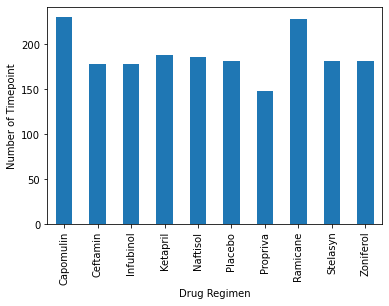

In [268]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bars = clean_mice.groupby(["Drug Regimen"])["Timepoint"].count()
bars.plot(kind="bar",ylabel="Number of Timepoint")

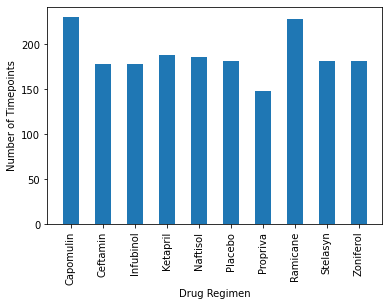

In [269]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bars.index,bars.values,width=0.5)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

<AxesSubplot:ylabel='Sex'>

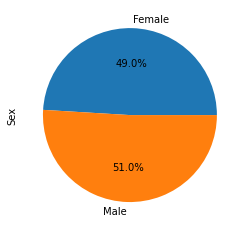

In [270]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = clean_mice.groupby(["Sex"])["Sex"].count()
sex_group.plot.pie(y= "Number of Mice",autopct='%1.1f%%')

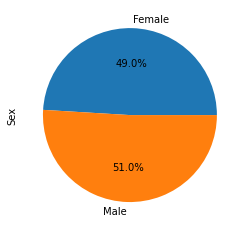

In [271]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_group, labels=sex_group.index,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots


In [272]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
from distutils.command.clean import clean


capomulin_timepoint = clean_mice[clean_mice["Drug Regimen"] == "Capomulin"].max()["Timepoint"]
capomulin = clean_mice[(clean_mice["Drug Regimen"] == "Capomulin")&(clean_mice["Timepoint"] == capomulin_timepoint)]
capomulin_vol = capomulin["Tumor Volume (mm3)"].mean()
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mice.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(clean_mice, max_timepoint, on=("Mouse ID", "Timepoint"), how="right")
max_timepoint_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
5,a401,Zoniferol,Female,8,25,45,66.794156,4
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
8,a457,Ketapril,Female,11,30,10,49.783419,0
9,a492,Stelasyn,Male,20,25,45,60.122011,1


In [273]:
# Put treatments into a list for for loop (and later for plot labels)
from operator import index


treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_capomulin = []
vol_ramicane = []
vol_infubinol = []
vol_ceftamin = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for index, row in max_timepoint_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        vol_capomulin.append(row[6])
    if row["Drug Regimen"] == "Ramicane":
        vol_ramicane.append(row[6])
    if row["Drug Regimen"] == "Infubinol":
        vol_infubinol.append(row[6])
    if row["Drug Regimen"] == "Ceftamin":
        vol_ceftamin.append(row[6])
    
    # add subset 
drug_tum_vol = pd.DataFrame({"Capomulin": vol_capomulin,
                       "Ramicane": vol_ramicane,
                       "Infubinol": vol_infubinol,
                       "Ceftamin": vol_ceftamin
                       })
drug_tum_vol.head()
    
#     # Determine outliers using upper and lower bounds
for treatment in treatments:
     drug_tum_vol_2 =drug_tum_vol[treatment]
     quartiles = drug_tum_vol_2.quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = upperq-lowerq

     print(f"The lower quartile of {treatment} is: {lowerq}")
     print(f"The upper quartile of {treatment} is: {upperq}")
     print(f"The interquartile range of {treatment} is: {iqr}")
     print(f"The the median of {treatment} is: {quartiles[0.5]} ")

     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr)
     print(f"Values below {lower_bound} could be outliers for {treatment}.")
     print(f"Values above {upper_bound} could be outliers for {treatment}.")
     print("===================================")
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
The lower quartile of Ceftamin is:

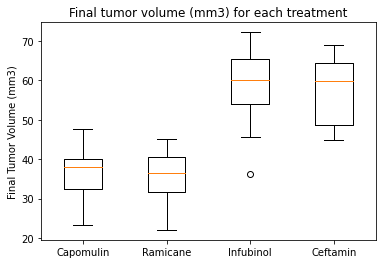

In [292]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_tum_vol_2 =[drug_tum_vol["Capomulin"], drug_tum_vol["Ramicane"], drug_tum_vol["Infubinol"], drug_tum_vol["Ceftamin"]]
fig1, ax1 = plt.subplots()
ax1.set_title(f"Final tumor volume (mm3) for each treatment")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_tum_vol_2)
plt.xticks([1, 2, 3, 4], treatments)
plt.show()

## Line and Scatter Plots

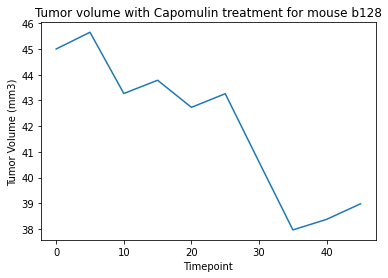

In [275]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = clean_mice[clean_mice["Mouse ID"] == "b128"]
line_plot
x_axis = line_plot["Timepoint"] 
tum_vol = line_plot["Tumor Volume (mm3)"] 
plt.plot(x_axis, tum_vol)
plt.title("Tumor volume with Capomulin treatment for mouse b128") 
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

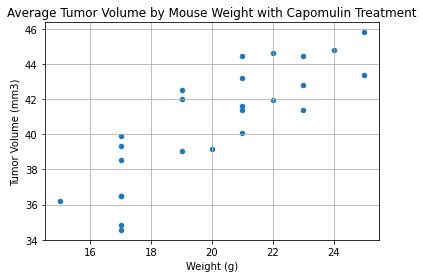

In [276]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = clean_mice[clean_mice["Drug Regimen"] == "Capomulin"]
scatter_plot
scatter_plot = scatter_plot.groupby(["Mouse ID"]).mean()
scatter_plot.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True,
              title="Average Tumor Volume by Mouse Weight with Capomulin Treatment")
plt.show()



## Correlation and Regression

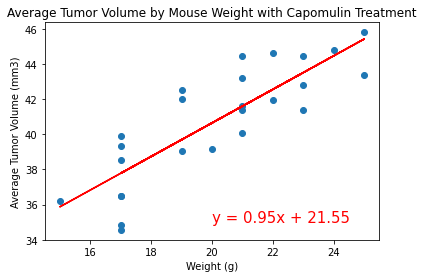

The correlation coefficient between the Tumor Volume and the Mouse Weight with Capomulin Treatment is 0.84


In [284]:
# Calculate the correlation coefficient and linear regression model 

x_values = scatter_plot["Weight (g)"]
y_values = scatter_plot["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight with Capomulin Treatment")
plt.show()

print(f"The correlation coefficient between the Tumor Volume and the Mouse Weight with Capomulin Treatment is {round(st.pearsonr(x_values,y_values)[0],2)}")

